<center> <h1>Seminario de Programación</h1> </center>
<center> <h2>Taller 1</h1> </center>
<center> <h3>Integrantes: </h1> </center>
<center> <h3>Katherine Morantes - Yamit Amaya</h1> </center>


## Carga de librerias
Inicialmente llamamos la librerias necesarias para el analisis de la dataframe.

In [3]:
import numpy as np
import scipy.stats as ss
import pandas as pd

import dataprep.eda as dp

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from pandas_profiling import ProfileReport

from ipywidgets import interact, Layout
import ipywidgets as widgets
from IPython.display import display

import os
from datetime import datetime 

## Carga de la base de datos
A continuación la base de datos requerida de la pagina de SECOP_II "Contratos electrónicos", información que se descarga el 24 de noviembre dde 2022. Adicionalmente se carga el archivo 'regiones_colombia.xlsx' para incluir la información de región de acuerdo con la clasificación del DANE en Colombia.

In [5]:
df = pd.read_csv('../Datos/Sin procesar/SECOP_II_-_Contratos_Electr_nicos.csv', low_memory=False)

Se realiza una muestra de la base de datos sin procesar

In [46]:
df_muestra = df.sample(1000)
df_muestra.to_csv('../Datos/Sin procesar/Muestra_SECOP_II_-_Contratos_Electr_nicos.csv', index=False)

In [6]:
dfregiones = pd.read_excel('../Datos/Sin procesar/regiones_colombia.xlsx')

## Ejercicio 1
Hacer una exploración por las siguientes variables que permita entender ¿qué miden? ¿qué categorías admiten? ¿Cómo afecta el problema que nos compete?
* Orden
* Rama
* Departamento
* Tipo de Contrato
* Estado Contrato
* Es Pyme


En principio para estar en contexto con la base de datos se realiza una breve descripción de algunas variables importantes, incluídas las 6 que especifica el ejercicio #1

### Diccionario de la base de datos de SECOP II (solo incluye algunas variables)

Si se desea consultar el diccionario completo, se puede descargar del siguiente enlace [Link](https://www.datos.gov.co/api/views/jbjy-vk9h/files/839439f9-b3b9-4e53-a28d-ab82e752a1dc?download=true&filename=Diccionario%20de%20Datos%20Abiertos%202022%20Contratos%20Electronicos.pdf "Diccionario de datos completo").


| **VARIABLE**                        | **DESCRIPCIÓN**                                                                   |
|-------------------------------------|-----------------------------------------------------------------------------------|
| **Nombre Entidad**                  | Nombre de la entidad del estado que publica el contrato                           |
| **Departamento**                    | Departamento en el cual se registró la entidad del estado que publica el contrato |
| **Orden**                           | Orden de la entidad del estado que publica el contrato                            |
| **Rama**                            | Rama del estado de la entidad que publica el contrato                             |
| **Estado Contrato**                 | Estado del contrato, frente a su ejecución, firma o liquidación                   |
| **Tipo de Contrato**                | Tipo de contrato de acuerdo a su marco jurídico                                   |
| **Fecha de Inicio del Contrato**    | Fecha de inicio de las responsabilidades contractuales                            |
| **Fecha de Fin del Contrato**       | Fecha de fin de las responsabilidades contractuales                               |
| **Proveedor Adjudicado**            | Nombre del proveedor adjudicado                                                   |
| **Nombre del proveedor adjudicado** | Determina si la empresa es una Pyme                                               |
| **Valor del Contrato**              | Valor total del contrato en pesos Colombianos                                     |
| **Objeto del Contrato**             | Objeto de ejecución definido en la redacción del contrato                         |


A continuación se presenta una muestra aleatoria de 5 registros de la base datos completa del SECOP II:

In [7]:
df.sample(5)

Nombre Entidad  Nit Entidad  \
1538671           AGENCIA PARA LA INFRAESTRUCTURA DEL META    900220547   
477489                            HOSPITAL MILITAR CENTRAL    830040256   
1175125  UNIDAD ADMINISTRATIVA ESPECIAL CUERPO OFICIAL ...    899999061   
1042044              RADIO TELEVISION NACIONAL DE COLOMBIA    900002583   
1798620                              GOBERNACION DE NARIÑO    800103923   

                       Departamento         Ciudad  \
1538671                        Meta  Villavicencio   
477489   Distrito Capital de Bogotá    No Definido   
1175125  Distrito Capital de Bogotá         Bogotá   
1042044  Distrito Capital de Bogotá         Bogotá   
1798620                      Nariño          Pasto   

                             Localización        Orden  \
1538671  Colombia,  Meta ,  Villavicencio  Territorial   
477489           Colombia, Bogotá, Bogotá     Nacional   
1175125          Colombia, Bogotá, Bogotá  Territorial   
1042044          Colombia, Bogotá, Bogotá     Nacional   
1798620        Colombia,  Nariño ,  Pasto  Territorial   

                                                    Sector       Rama  \
1538671                             No aplica/No pertenece  Ejecutivo   
477489                                             defensa  Ejecutivo   
1175125                                    Ley de Justicia  Ejecutivo   
1042044  Tecnologías de la Información y las Comunicaci...  Ejecutivo   
1798620                             No aplica/No pertenece  Ejecutivo   

        Entidad Centralizada Proceso de Compra  ...  \
1538671      Descentralizada  CO1.BDOS.2720329  ...   
477489       Descentralizada  CO1.BDOS.2836707  ...   
1175125      Descentralizada  CO1.BDOS.1401135  ...   
1042044      Descentralizada  CO1.BDOS.1981586  ...   
1798620         Centralizada  CO1.BDOS.2749669  ...   

        Sistema General de Regalías  \
1538671                           0   
477489                            0   
1175125                           0   
1042044                           0   
1798620                           0   

        Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)  \
1538671                                           22062600                   
477489                                                   0                   
1175125                                                  0                   
1042044                                                  0                   
1798620                                            6300000                   

        Recursos de Credito Recursos Propios    Ultima Actualizacion  \
1538671                   0                0  11/16/2022 12:00:00 AM   
477489                    0                0  10/25/2022 12:00:00 AM   
1175125                   0         14644000  04/19/2021 12:00:00 AM   
1042044                   0         21000000  09/17/2021 12:00:00 AM   
1798620                   0                0  09/15/2022 12:00:00 AM   

        Codigo Entidad Fecha Inicio Liquidacion Fecha Fin Liquidacion  \
1538671      706520657                      NaN                   NaN   
477489       700587033      2022-12-15 05:00:00   2023-06-16 04:59:00   
1175125      702312703                      NaN                   NaN   
1042044      701172108                      NaN                   NaN   
1798620      700694045                      NaN                   NaN   

        Codigo Proveedor                                Objeto del Contrato  
1538671        703182675  PRESTACIÓN DE SERVICIOS PARA EL MANTENIMIENTO ...  
477489         704738947  SUMINISTRO DE MEDICAMENTOS DE ALTO COSTO BRENT...  
1175125        704786920  PRESTAR SUS SERVICIOS DE APOYO EN EL MARCO DE ...  
1042044        708961081  EL CONTRATISTA se obliga con RTVC a prestar su...  
1798620        715910568  LA CONTRATISTA se obliga para con EL DEPARTAME...  

[5 rows x 71 columns]

Validamos el tipo de variables en estudio para lo cual utilizamos info()

In [8]:
df[['Orden','Rama','Departamento','Tipo de Contrato','Estado Contrato','Es Pyme']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012444 entries, 0 to 2012443
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Orden             object
 1   Rama              object
 2   Departamento      object
 3   Tipo de Contrato  object
 4   Estado Contrato   object
 5   Es Pyme           object
dtypes: object(6)
memory usage: 92.1+ MB


Al revisar el tipo de variables en estudio con info() y a partir de la muestra aleatoria, observamos que todas son tipo objeto de Pandas (no hay numéricas) por tanto tenemos 6 variables categóricas.

A continuación buscamos la descripción de la variables en estudio: "Orden, Rama, Departamento, Tipo de Contrato, Estado Contrato, Es Pyme que nos permita identificar cómo afecta el problema que nos compete.

In [9]:
df[['Orden','Rama','Departamento','Tipo de Contrato','Estado Contrato','Es Pyme']].describe()

Orden       Rama                Departamento  \
count       2012444    2012444                     2012444   
unique            4          5                          34   
top     Territorial  Ejecutivo  Distrito Capital de Bogotá   
freq        1206232    1710812                      878159   

               Tipo de Contrato Estado Contrato  Es Pyme  
count                   2012444         2012444  2012444  
unique                       23              11        2  
top     Prestación de servicios    En ejecución       No  
freq                    1703728          732266  1680257

De acuerdo con el resultado obtenidos encontramos:

+ Orden: Hace referencia al orden de la entidad que pública el contrato, donde visualizamos que las entidades que más públican contratos son de orden Territorial en relación a los otras, con una frecuencia de 1.206.232 es decir 1.206.232 contratos publicados.

+ Rama: Hace referencia a la Rama del estado de la entidad que publica el contrato, podemos inferir que las entidades que más públican contratos pertenecen da la rama Ejecutivo, con una frecuencia de 1.710.812 (cantidad de contratos publicados).

+ Departamento: Hace referencia al Departamento en el cual se registró la entidad del estado que publica el contrato, con los datos arrojados observamos que las entidades que más publican contratos se encuentran ubicadas en el departamento Distrito Capital de Bogotá, con una frecuencia de los casos de 878.159.

+ Tipo de Contrato: Hace referencia al tipo de contrato de acuerdo a su marco jurídico, podemos observar que las entidades publican mas del tipo de contrato de Prestación de servicios en relación a los otros 22 tipos de contratos, con una frecuencia de 1.703.728.

+ Estado Contrato: Hace referencia al estado del contrato, frente a su ejecución, firma o liquidación, podemos inferir que la mayoría de los contratos se encuentran en ejecución, con una cantidad de 732.266.

+ Es pyme: Hace referencia si la empresa a la que se le adjudica el contrato es una Pyme, podemos observar que la mayoría de contratos son asignados a empresas que no son pymes, con una cantidad de 1.680.257 del total de los 2.012.444 contratos analizados.

A continuación se valida si en la data tenemos el número de registros nulos en cada una de las variables de interés:

In [10]:
df[['Orden','Rama','Departamento','Tipo de Contrato','Estado Contrato','Es Pyme','Valor del Contrato']]

Orden       Rama                Departamento  \
0           Nacional  Ejecutivo                      Nariño   
1           Nacional  Ejecutivo  Distrito Capital de Bogotá   
2        Territorial  Ejecutivo                        Meta   
3        Territorial  Ejecutivo                   Santander   
4           Nacional  Ejecutivo  Distrito Capital de Bogotá   
...              ...        ...                         ...   
2012439     Nacional  Ejecutivo                   Antioquia   
2012440  Territorial  Ejecutivo                   Antioquia   
2012441  Territorial  Ejecutivo                       Huila   
2012442  Territorial  Ejecutivo                   Risaralda   
2012443  Territorial  Ejecutivo                        Meta   

                Tipo de Contrato Estado Contrato Es Pyme  Valor del Contrato  
0        Prestación de servicios      Modificado      No            34730000  
1        Prestación de servicios    En ejecución      No            16000000  
2        Prestación de servicios       terminado      No            19241739  
3        Prestación de servicios          Activo      No            11700000  
4        Prestación de servicios      Modificado      No            25440000  
...                          ...             ...     ...                 ...  
2012439  Prestación de servicios       terminado      No            21013333  
2012440  Prestación de servicios      Modificado      No            27707485  
2012441  Prestación de servicios         Cerrado      Si             1800000  
2012442  Prestación de servicios    En ejecución      Si             8010000  
2012443  Prestación de servicios    En ejecución      No            10400000  

[2012444 rows x 7 columns]

In [11]:
df[['Orden','Rama','Departamento','Tipo de Contrato','Estado Contrato','Es Pyme']].isnull().sum()

Orden               0
Rama                0
Departamento        0
Tipo de Contrato    0
Estado Contrato     0
Es Pyme             0
dtype: int64

De acuerdo con el resultado arrojado observamos que no tenemos datos nulos de las 6 variables en estudio.

A continuación revisamos que categorías admite en el arreglo de cada variable:

In [12]:
df['Rama'].unique()

array(['Ejecutivo', 'Legislativo', 'Corporación Autónoma', 'Judicial',
       'No Definido'], dtype=object)

Los valores que admite la variable *Rama* admite las siguientes categorías, Rama del estado de la entidad que publica el contrato:
* Ejecutivo: Hace referencia a la rama ejecutiva que es representada por el presidente de la republica.
* Legislativo: Hace referencia a la rama legislativa es represntada por el congreso de la republica
* Coorporación Autonoma : Hace referencia a la rama de Coorporación Autonoma
* Judicial : Hace referencia a la rama judicial esta conformada por las cot¿rtes y los tribunales.
* No definido: Hace referencia a que no se tiene información de la rama para ese contrato


In [13]:
df['Orden'].unique()

array(['Nacional', 'Territorial', 'Corporación Autónoma', 'No Definido'],
      dtype=object)

De acuerdo a lo anterior encontramos que para la variable  *Orden* admite las siguientes categorías:
* Nacional: hace referencia a aquella entidad de orden Nacional que pública el contrato
* Territorial: hace referencia a aquella entidad de orden Territorial que pública el contrato
* Corporación Autónoma: hace referencia a aquella entidad de orden Corporación Autónoma que pública el contrato
* No Definido: Hace referencia a que no se cuenta con un orden definida que pública el contrato.

In [14]:
df['Departamento'].unique()

array(['Nariño', 'Distrito Capital de Bogotá', 'Meta', 'Santander',
       'Caldas', 'Valle del Cauca', 'Atlántico', 'Tolima', 'Bolívar',
       'Antioquia', 'Boyacá', 'Norte de Santander', 'Risaralda',
       'Magdalena', 'Casanare', 'Caquetá', 'Córdoba', 'Cundinamarca',
       'Quindío', 'Cauca', 'Chocó',
       'San Andrés, Providencia y Santa Catalina', 'Huila', 'Cesar',
       'Sucre', 'Guaviare', 'La Guajira', 'Putumayo', 'Amazonas',
       'Vichada', 'Arauca', 'No Definido', 'Guainía', 'Vaupés'],
      dtype=object)

De acuerdo a lo anterior encontramos que para la variable *Departamento* admite las siguientes categorías del Departamento en el cual se registró la entidad del estado que publica el contrato:

Nariño, Meta, Santander, Distrito Capital de Bogotá, Risaralda, Valle del Cauca, Atlántico, Caldas,
Norte de Santander, Tolima, Antioquia, Cundinamarca, Boyacá, Córdoba, Bolívar, Sucre, Magdalena, Casanare,
Cauca, San Andrés, Providencia y Santa Catalina, La Guajira, Quindío, Cesar, Chocó, Huila, Caquetá, No Definido, Guaviare, Putumayo, Amazonas, Vichada, Arauca, Guainía, Vaupés.

Se observa que el Distrito Capital de Bogotá se toma  como un departamento y que hay contratos en donde la variable departamento tiene la etiqueta "No Definido".

In [15]:
df['Tipo de Contrato'].unique()

array(['Prestación de servicios', 'DecreeLaw092/2017', 'Otro',
       'Compraventa', 'Suministros', 'Arrendamiento de inmuebles',
       'Interventoría', 'Servicios financieros', 'Obra', 'Seguros',
       'Comodato', 'Consultoría', 'No Especificado',
       'Acuerdo Marco de Precios', 'Arrendamiento de muebles',
       'Asociación Público Privada', 'Venta inmuebles',
       'Negocio fiduciario', 'Emprestito', 'Comisión', 'Venta muebles',
       'Concesión', 'Acuerdo de cooperación'], dtype=object)

De acuerdo a lo anterior encontramos que para la variable *Tipo de Contrato* admite las siguientes categorías que hace referencia al tipo de contrato de acuerdo a su marco juridico:

Prestación de servicios, DecreeLaw092/2017, Compraventa, Otro, Negocio fiduciario, Suministros,
Arrendamiento de inmuebles, Servicios financieros, Obra, Seguros, Comodato, Consultoría, No Especificado, Interventoría, Arrendamiento de muebles, Acuerdo Marco de Precios, Asociación Público Privada, Venta inmuebles, Emprestito, Comisión, Venta muebles, Concesión, Acuerdo de cooperación.

In [16]:
df['Estado Contrato'].unique()

array(['Modificado', 'En ejecución', 'terminado', 'Activo', 'Cerrado',
       'Borrador', 'En aprobación', 'cedido', 'enviado Proveedor',
       'Suspendido', 'Prorrogado'], dtype=object)

De acuerdo a lo anterior encontramos que para la variable *Estado de Contrato*  que hace referencia frente a su ejecución, firma o liquidación, admite las siguientes categorias:
* Modificado: Hace referencia al contrato cuando ha tenido algun tipo de cambio.
* terminado Hace referencia al contrato cuando ha sido culminado.
* Activo: Hace referencia cuando el contrato se encuentra en estado activo
* En ejecución: Hace refrencia cuando el contrato se encuentra en desarrollo.
* Cerrado: Hace refrencia cuando el contrato ya es cerrado.
* Borrador: Hace referncia cuando el contrato se encuentra en borrador
* cedido: Hace refrencia cunado el contrato es cedido a un tercero.
* En aprobación: Hace refrencia cuando el contrato esta en aprobación.
* enviado Proveedor: hace refrencia cuando el contrato es remitido a proveedor.
* Suspendido: Hace referencia cuando el contrato ha sido suspendido.
* Prorrogado: Hace referencia al contrato cuando a sufrido una extención del tiempo de la fecha definida inicialmemte.

In [17]:
df['Es Pyme'].unique()

array(['No', 'Si'], dtype=object)

De acuerdo a lo anterior encontramos que para la variable *Es pyme* donde determina si la empresa es una pyme admite las siguientes categorias:
* No: No es pyme
* Si: Si es pyme

In [18]:
df['Sector'].unique()

array(['Trabajo', 'Cultura', 'Ambiente y Desarrollo Sostenible',
       'Servicio Público', 'Salud y Protección Social',
       'Educación Nacional', 'No aplica/No pertenece',
       'Inclusión Social y Reconciliación', 'Industria', 'Planeación',
       'Ley de Justicia', 'deportes', 'Información Estadística',
       'interior', 'Transporte', 'defensa',
       'Vivienda, Ciudad y Territorio',
       'Tecnologías de la Información y las Comunicaciones',
       'Hacienda y Crédito Público', 'Minas y Energía', 'agricultura',
       'Ciencia Tecnología', 'Presidencia de la República',
       'Relaciones Exteriores',
       'Inteligencia Estratégica y Contrainteligencia', 'No Definido'],
      dtype=object)

De acuerdo a lo anterior encontramos que para la variable *Sector*, entidad del estado que publica el contrato admite las siguientes categorias:
Trabajo, Ambiente y Desarrollo Sostenible, Servicio Público, Salud y Protección Social, Educación Nacional,
No aplica/No pertenece, Inclusión Social y Reconciliación, Cultura, Industria, Ley de Justicia, deportes, defensa,Vivienda, Ciudad y Territorio, interior, agricultura, Transporte, Hacienda y Crédito Público, Planeación, Minas y Energía, Información Estadística, Tecnologías de la Información y las Comunicaciones, Ciencia Tecnología, Presidencia de la República, Relaciones Exteriores, Inteligencia Estratégica y Contrainteligencia, No Definido.

### Observación Análisis Exploratorio:

Adicional a la descripción anterior, cabe resaltar que a pesar de que las 6 variables de interés no tienen campos nulos, sí se identifica que algunas de ellas no tienen la información completa por tanto aparece el campo como "No definido" lo cual es importante para el análisis posterior de la información.

### Selección base de datos sector Protección Social

A continuación se realizan las siguientes acciones para realizar el filtrado de la base de datos general con el fin de trabajar únicamente con contratos que pertenezcan al sector protección social, adicionalmente se agregan las nuevas columnas "Región" y "Año" para dar respuesta a las preguntas posteriores del taller así como también se unifican los nombres de la variable Departamento que corresponden a Bogotá y al San Andrés y Providencia para poder cruzar correctamente la base general con la base de regiones.

In [19]:
df['Fecha de Inicio del Contrato'] = pd.to_datetime(df['Fecha de Inicio del Contrato'])
df_prot_social = df[(df['Sector']=='Salud y Protección Social')]

In [20]:
df_prot_social.Departamento.unique()

array(['Distrito Capital de Bogotá', 'Caldas', 'Atlántico', 'Tolima',
       'Caquetá', 'Córdoba', 'Santander', 'Norte de Santander', 'Huila',
       'Valle del Cauca', 'Casanare', 'Magdalena', 'Chocó', 'Antioquia',
       'Bolívar', 'Vichada', 'Sucre', 'Cauca', 'Cundinamarca', 'Nariño',
       'Amazonas', 'Meta', 'Arauca', 'No Definido', 'Cesar', 'Putumayo',
       'Guaviare', 'Boyacá', 'Vaupés',
       'San Andrés, Providencia y Santa Catalina', 'Guainía',
       'La Guajira', 'Quindío', 'Risaralda'], dtype=object)

In [21]:
dfregiones.Departamento.unique()

array(['Guaviare', 'Guainía', 'Putumayo', 'Caquetá', 'Amazonas', 'Vaupés',
       'Sucre', 'Magdalena', 'La Guajira', 'Córdoba', 'Cesar', 'Bolívar',
       'Atlántico',
       'Archipiélago de San Andrés, Providencia y Santa Catalina',
       'Santander', 'Norte de Santander', 'Cundinamarca', 'Boyacá',
       'Bogotá D.C.', 'Tolima', 'Huila', 'Risaralda', 'Quindío', 'Caldas',
       'Antioquia', 'Vichada', 'Meta', 'Casanare', 'Arauca',
       'Valle del Cauca', 'Nariño', 'Chocó', 'Cauca'], dtype=object)

In [22]:
dfregiones.replace({'Bogotá D.C.':'Distrito Capital de Bogotá', 'Archipiélago de San Andrés, Providencia y Santa Catalina': 'San Andrés, Providencia y Santa Catalina'},inplace=True)

In [23]:
df_prot_social = pd.merge(df_prot_social,dfregiones, on='Departamento', how="outer")

In [24]:
df_prot_social['Año'] = df_prot_social['Fecha de Inicio del Contrato'].dt.year

Se valida si la nueva base de datos contiene valores nulos

In [25]:
df_prot_social['Region'].isnull().sum()

1892

Se encuentran 1.892 datos nulos en la nueva variable Región por tanto se procede a cambiar los valores nulos por el valor "No definido"

In [26]:
df_prot_social['Region']=df_prot_social['Region'].fillna('No definido')

In [27]:
df_prot_social['Region'].isnull().sum()

0

In [28]:
df_prot_social['Año'].isnull().sum()

18975

En la nueva variable Año se encuentran 18.975 valores nulos pero no se realiza ningún ajuste ya que es parte del análisis posterior en el taller.

Finalmente se realiza una muestra de la base de datos de sector protección social procesada

In [29]:
df_prot_social_muestra = df_prot_social.sample(1000)

In [45]:
df_prot_social_muestra.to_csv('../Datos/Procesados/Muestra_base_datos_proteccion_social.csv', index=False)

## Ejercicio 2
Crear un reporte (con un miniaplicativo incluido) que permita visualizar lo siguiente:

* Suma de valores de contratos del sector protecci ́on social por departamento segu ́n un rango de fechas que use la fecha de inicio de contratos. Facilitar la consulta en regiones por año.
* En el reporte anterior incluir cantidad de contratos por región, también deben visualizarse los contratos que no posean fecha de inicio ¿Cuántos son?
* Permita excluir datos atípicos, utilice un criterio debidamente justificado para excluir los contratos de alto valor.


A continuación se realiza el reporte para dar respuesta a lo anterior.

In [31]:
def func_contratos_dpto(f_inicio,f_fin,region):
    
    print ('REGIÓN SELECIONADA: ',region) 
    
    if region=='Todas':
        df2 = df_prot_social[(df_prot_social['Fecha de Inicio del Contrato']>pd.to_datetime(f_inicio)) & (df_prot_social['Fecha de Inicio del Contrato']<pd.to_datetime(f_fin))]
        region = 'Todas las regiones'
    elif region=='nan':
        df2 = df_prot_social[(df_prot_social['Region']=='') & (df_prot_social['Fecha de Inicio del Contrato']>pd.to_datetime(f_inicio)) & (df_prot_social['Fecha de Inicio del Contrato']<pd.to_datetime(f_fin))]
    else:
        df2 = df_prot_social[(df_prot_social['Region']==region) & (df_prot_social['Fecha de Inicio del Contrato']>pd.to_datetime(f_inicio)) & (df_prot_social['Fecha de Inicio del Contrato']<pd.to_datetime(f_fin))]
    
    dfout = df2.groupby(['Region','Departamento'])['Valor del Contrato'].agg(['sum','count']).reset_index()
    dfout.rename(columns={'sum':'Total suma contratos','count':'Total cantidad contratos'}, inplace=True)
    
    print(f"\nEn la siguiente tabla se puede observar la suma total de los contratos que iniciaron desde el {f_inicio.strftime('%d-%m-%Y')} hasta el {f_fin.strftime('%d-%m-%Y')} (periodo seleccionado) para cada departamento de la región seleccionada ({region}). ")
    print('\nAdicionalmente se muestran la cantidad de contratos para cada departamento. La tabla se encuentra ordenada por Región y Departamento.\n')
    display(dfout.style.format(thousands=','))
    
    dfout = df2.groupby(['Region','Departamento','Año'])['Valor del Contrato'].agg(['sum','count']).reset_index()

    dfout.rename(columns={'sum':'Total suma contratos','count':'Total cantidad contratos'}, inplace=True)
    fig = px.line(dfout, x="Año", y="Total suma contratos", color='Departamento')
    fig.update_layout(title_text = 'Total contratos para '+region,title_x=0.5)
    print('\nEn esta gráfica se puede observar la suma total de contratos por año (de acuerdo con el periodo seleccionado) para cada departamento de la región escogida\n')
    fig.show()
   
    return

inicio = widgets.DatePicker(value=datetime.today(), description='Fecha inicial')
fin = widgets.DatePicker(value=datetime.today(),description='Fecha final')
lista_años = df_prot_social['Año'].unique()

print('\nA continuación seleccionar una fecha inicial y una fecha final para validar los contratos del sector Protección Social que inician en dicho periodo:\n')


interact(func_contratos_dpto,f_inicio=inicio,f_fin=fin, region=widgets.ToggleButtons(options=np.append(df_prot_social['Region'].unique(),'Todas'),index=7,description="Región:",button_style='success'))


A continuación seleccionar una fecha inicial y una fecha final para validar los contratos del sector Protección Social que inician en dicho periodo:



interactive(children=(DatePicker(value=datetime.datetime(2023, 1, 25, 22, 58, 25, 818357), description='Fecha …

<function __main__.func_contratos_dpto(f_inicio, f_fin, region)>

En el siguiente reporte se obtiene como salida una tabla por cada Región incluyendo información de:

* Total suma de contratos por cada región
* Total cantidad de contratos de cada región
* Total cantidad de contratos sin fecha de inicio de cada región
* Porcentaje de contratos sin fecha de inicio de cada región 

Adicionalmente se obtiene una gráfica que permite observar y comparar graficamente la cantidad total de contratos de cada región; así como la cantidad de contratos sin fecha de inicio.

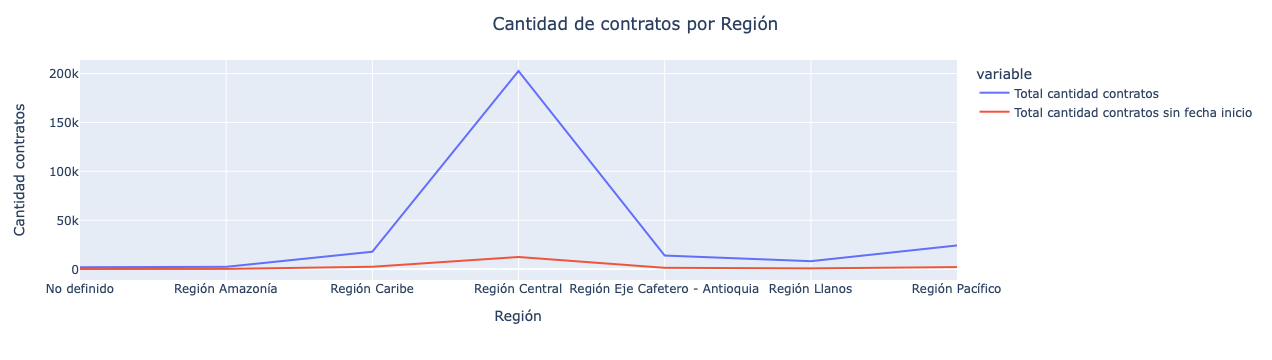

In [32]:
df_reg = df_prot_social.groupby(['Region'])['Valor del Contrato'].agg({'sum','count'}).reset_index()
df_sinfecha = df_prot_social[(df_prot_social['Fecha de Inicio del Contrato'].isnull())]
df_reg_final = pd.merge(df_reg,df_sinfecha.groupby(['Region'])['Valor del Contrato'].agg({'count'}).reset_index(), on='Region')
df_reg_final['% contratos sin fecha inicio'] = df_reg_final['count_y']/df_reg_final['count_x']
df_reg_final['% contratos sin fecha inicio'] = df_reg_final['% contratos sin fecha inicio'].apply('{:.2%}'.format)
df_reg_final.rename(columns={'sum':'Total suma contratos','count_x':'Total cantidad contratos','count_y':'Total cantidad contratos sin fecha inicio'}, inplace=True)
display(df_reg_final.style.format(thousands=','))
fig = px.line(df_reg_final, x="Region", y=["Total cantidad contratos","Total cantidad contratos sin fecha inicio"], labels={'value':'Cantidad contratos', 'Region':'Región'},)
fig.update_layout(title='Cantidad de contratos por Región', title_x=0.5)
fig.show()

De los resultados anteriores (tabla y gráfica) se puede concluir lo siguiente:

* La región Central tiene la mayor cantidad de contratos con 202.637 que suman en un total de $7.090.792.492.976.957

* La región Amazonía tiene la menor cantidad de contratos con 2.299 que suman en un total de $628.261.59.311

* Al comparar la cantidad de contratos sin fecha de inicio respecto de la totalidad de contratos de cada región, se observa que la región Caribe tiene el mayor porcentaje de contratos sin fecha de inicio con un 13,37%.
    

Se realiza una copia de una muesta de los contratos sin fecha de inicio:

In [33]:
df_sinfecha_muestra = df_sinfecha.sample(1000)

In [34]:
df_sinfecha_muestra.to_csv('../Datos/Procesados/Muestra_Contratos_sin_fecha_inicio.csv', index=False)

### Validando datos atípicos de acuerdo con la variable Valor del Contrato

En primera instancia se realiza una descripción cuantitativa de la variable "Valor del Contrato" para entender de manera general, con base en estadísticos descriptivos, el comportamiento de la misma. Se obtiene lo siguiente:

* Mínimo: 0
* Cuartíl 1 (25%): 6.728.839,75
* Mediana (50%): 17.703.030
* Cuartíl 3 (75%): 37.740.000
* Máximo: 6.158.661.742.599.964

In [35]:
pd.DataFrame(df_prot_social['Valor del Contrato'].describe()).style.format(thousands=',',precision=2)

La variable "Valor del Contrato" no tiene valores nulos.

In [36]:
df_prot_social['Valor del Contrato'].isnull().sum()

0

En la siguiente gráfica se observa un boxplot de la variable "Valor del Contrato" para los contratos del sector "Protección Social" en el cual podemos identificar lo siguiente:


* Cuartíl 1: 6,72868M (valor aproximado en millones)
* Cuartíl 3: 37,74M (valor aproximado en millones)
* Límite inferior: 0
* Límite superior: 84,25M (valor aproximado en millones)

De esta manera se requiere identificar los datos atípicos mayores al límite superior ya que el límite inferior es cero (0) que corresponde al mínimo y por tanto solo existen datos atípicos a la derecha (valor del contrato mayor a 84,25M).

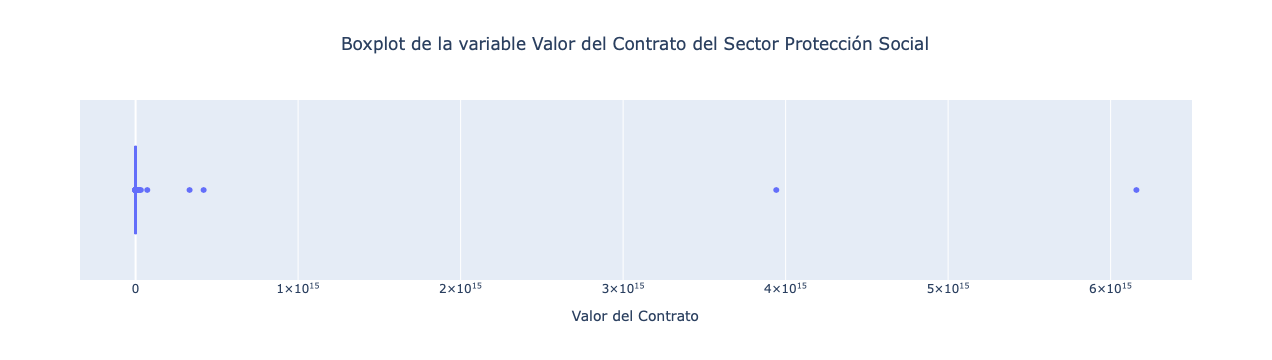

In [37]:
fig2 = px.box(df_prot_social,x='Valor del Contrato', notched=True, title = 'Boxplot de la variable Valor del Contrato del Sector Protección Social')
fig2.update_layout(title_x=0.5)
fig2.show()

Con el fin de excluir datos atípicos se usa el criterio del Rango Intercuartílico (IQR). Para esto se calcula el IQR a partir de los cuartiles 1 y 3 y luego se calculan los límites superiores e inferiores así:

$$
\begin{align}
Límite \hspace{0.2cm} superior = Q3 + 1.5*IQR \\
Límite \hspace{0.2cm}inferior = Q1 - 1.5*IQR
\end{align}
$$

A partir de los límites inferior y superior (aunque ya sabemos de los resultados anteriores que el límite inferior es cero (0)), los datos atípicos corresponden a todos los valores de contratos mayores al límite superior.


In [38]:
# método del rango intercuartílico
q1 = np.percentile(df_prot_social['Valor del Contrato'], 25,method = 'linear')
q3 = np.percentile(df_prot_social['Valor del Contrato'], 75,method = 'linear')
IQR = q3 - q1

print ('Cuartíl 1:',q1,' Cuartíl 3:',q3)
 
# Datos mayores al límite superior
superiores = np.where(df_prot_social['Valor del Contrato'] > (q3+1.5*IQR))
# Datos menores al lLímite inferior
inferiores = np.where(df_prot_social['Valor del Contrato'] < (q1-1.5*IQR))

# Dataframes sin datos atípicos y de los datos atípicos
df_sin_atipicos = df_prot_social.drop(superiores[0])
df_sin_atipicos.drop(inferiores[0])
df_atipicos = df_prot_social.iloc[superiores[0],:]
 
print("Dimensión dataframe inicial: ", df_prot_social.shape, '\nDimensión dataframe sin datos atípicos',df_sin_atipicos.shape,'\nDimensión de datos atípicos',df_atipicos.shape)

Cuartíl 1: 6728839.75  Cuartíl 3: 37740000.0
Dimensión dataframe inicial:  (270616, 73) 
Dimensión dataframe sin datos atípicos (242241, 73) 
Dimensión de datos atípicos (28375, 73)


Como resultado se obtiene el dataframe "df_sin_atipicos" que corresponde al conjunto de datos sin datos atípicos y el dataframe "df_atipicos" que corresponde al conjunto de datos de solo los datos atípicos.

* El dataframe inicial (df_prot_social) tiene 270.616 registros
* El dataframe excluyendo los datos atípicos (df_sin_atipicos) tiene 242.241 registros
* El dataframe de los datos atípicos (df_atipicos) tiene 28.375 registros

A continuación se realiza muestra de los dataframes que sin datos atípicos y de solo los datos atípicos:

In [40]:
df_sin_atipicos_muestra = df_sin_atipicos.sample(1000)
df_atipicos_muestra = df_atipicos.sample(1000)

In [41]:
df_sin_atipicos_muestra.to_csv('../Datos/Procesados/Muestra_Contratos_proteccion_social_sin_atipicos.csv', index=False)
df_atipicos_muestra.to_csv('../Datos/Procesados/Muestra_Contratos_proteccion_social_atipicos.csv', index=False)

## Ejercicio 3
Haga un reporte frente a los contratos excluidos. Tenga cuidado con ese rango tan amplio de la variable Valor del Contrato. Estudie la cantidad de contratos de ese tipo por regiones, explore la suma del valor del contrato en el tiempo, entre otros.

In [42]:
df_reg = df_atipicos.groupby(['Region'])['Valor del Contrato'].agg({'sum','count'}).reset_index()
df_reg.rename(columns={'sum':'Total suma contratos','count':'Total cantidad contratos'}, inplace=True)

display(df_reg.style.format(thousands=','))

In [43]:
variables_interes = ['Orden','Rama','Departamento','Tipo de Contrato','Estado Contrato','Es Pyme','Todas']

def grafica_df(var_interes, var_filtro):
    
    if var_filtro=='Todas':
        df_grafica = df_atipicos
        var_filtro ='Todas las regiones'
    else:
        df_grafica = df_atipicos[df_atipicos['Region']==var_filtro]
        
    if var_interes == 'Todas':
        fig = px.line(df_grafica.groupby(['Año'])['Valor del Contrato'].agg({'sum'}).reset_index(), x="Año", y="sum")
        fig.update_layout(title=var_filtro+': Evolución suma de contratos - Todas las variables', title_x=0.5)
        fig.show()
    else:
        fig = px.line(df_grafica.groupby([var_interes,'Año'])['Valor del Contrato'].agg({'sum'}).reset_index(), x="Año", y="sum", color=var_interes)
        fig.update_layout(title=var_filtro+': Evolución suma de contratos diferenciada por la variable '+var_interes, title_x=0.5, yaxis= {'title': {'text': 'Suma contratos [pesos]'}})
        fig.show()
    
interes = widgets.RadioButtons(options=variables_interes, description='Variable:',disabled=False,index=6)
filtro = widgets.Dropdown(options=np.append(df_atipicos['Region'].unique(),'Todas'), description='Región:')

interact(grafica_df, var_interes=interes, var_filtro=filtro)

interactive(children=(RadioButtons(description='Variable:', index=6, options=('Orden', 'Rama', 'Departamento',…

<function __main__.grafica_df(var_interes, var_filtro)>

De acuerdo con el reporte generado encontramos que:

* La región Central es la zona que más contratos publica en relación a los otras regionales con una cantidad de 17,650 total de contratos que equivale a una suma total de 7,087,019,372,729,821 pesos.
* Para la información clasificada como "No definido" podemos visualizar que representa actualmente a una cantidad total de 375 contratos con un valor que representa 95,140,019,110.
* La Región Amazonía es la zona que menos contratos pública en relación con las otras regionales con una cantidad total de 465 contratos con un suma total de contratos que corresponde a 580,978,548,216.

## Comportamiento de las variables de acuerdo con su región:

Orden vs todas las regiones
* En este grafico podemos visualizar que el valor mas reperesentativo de orden es el territorial en relación a los otros tipos de orden, encontramos que para los años 2018 y 2020 se presentaron los picos mas altos en la suma de contratos publicados con un valor de 477.3877 (Trillones aproximadamenet) y 432.6902 (Trillones aproximadamente).

Rama vs todas las regiones
* De acuerdo con el resultado arrojado podemos inferir que la rama con mayor participación en relación a la suma de contratos es la Corporación Autónoma, para el 2019 al 2020 se presentó un crecimiento logarítmico en la suma de contratos y para los años 2020 entre 2021 se presenta un decrecimiento logarítmico, donde su pico más alto de da en el 2020 con un valor de 429.3749 (Trillones aproximadamente).

Departamento vs todas las regiones
* Para este resultado podemos observar que el departamento con mayor suma de contratos es Distrito Capital de Bogotá, donde los mayores picos se encuentran en 2018 con un valor de suma de contratos es de 477.603T cop y 2020 con un valor de suma de contratos es de 434.1403T cop, los departamentos que presentan una baja participación en la publicación de contratos son aquellos que hacen parte de la zona Amazonía.

Tipo de contrato vs todas las regiones
* Para este selección podemos visualizar que el tipo de contrato con mayor participación para la fecha 24 de noviembre de 2022 es de prestación de servicios, donde su comportamiento estuvo enmarcado de la siguiente manera: del 2017 al 2018 tuvo un crecimiento logarítmico y del 2018 al 2019 un decrecimiento logarítmico, los pico más alto que se presentaron fue para el 2018 con una suma de sus contratos de 456.0507T y para el año 2020 con una suma de sus contratos de 432.28667T,

Estado de contrato vs todas las regiones
* De acuerdo a la imagen podemos visualizar que frente a su ejecución  el estado de contrato borrador es el más representativo en relación a los otros estados de contratos, los picos más altos que se presentaron en la suma total de contratos fue para 2018 con un valor de 440.79667T y para el año 2020 con un valor en la suma de sus contratos de 431.2175T, se identifica que el estado de contrato menos representantivo de los datos es el cedido.

Es Pyme vs todas las regiones
* De acuerdo a la imagen podemos visualizar que la mayor suma de contratos adjudicados corresponde a empresas que no son Pyme, donde se presentan dos picos altos que corresponde a los años 2018 con un valor en la suma de contratos 424.9842T y para el año 2020 con un valor de 434.6266T, la suma de contratos adjudicados que corresponde a las empresas que son Pyme presenta el pico mas alto para el año 2018 un valor en suma de 52.6257T.

## Ejercicio 4
Haga un reporte frente a los contratos NO excluidos.

In [44]:
variables_interes = ['Orden','Rama','Departamento','Tipo de Contrato','Estado Contrato','Es Pyme','Todas']

output = widgets.Output()
output_plot = widgets.Output()

def grafica_df(var_interes, var_filtro):
    
    output_plot.clear_output()
    output.clear_output()
    
    with output:
        df_reg = df_sin_atipicos.groupby(['Region'])['Valor del Contrato'].agg({'sum','count'}).reset_index()
        df_reg.rename(columns={'sum':'Total suma contratos','count':'Total cantidad contratos'}, inplace=True)
        
        if (var_filtro!='Todas')|(var_interes!='Todas'):
            
            if (var_filtro=='Todas'):
                df_var = df_sin_atipicos
            else:
                df_var = df_sin_atipicos[df_sin_atipicos['Region']==var_filtro]
                
            df_datos = df_var.groupby([var_interes])['Valor del Contrato'].agg({'sum','count'}).reset_index()
            print('\nEn la siguiente tabla se muestran la cantidad y suma total de los contratos (sin incluir datos atípicos) para la variable '+var_interes+' y la región '+var_filtro+'\n')
            display(df_datos.style.format(thousands=','))
       
        print('\nEn la siguiente tabla se muestran la cantidad y suma total de los contratos (sin incluir datos atípicos) incluyendo todas las variables y agrupado por región\n')
        display(df_reg.style.format(thousands=','))
    
    with output_plot:
    
        if var_filtro=='Todas':
            df_grafica = df_sin_atipicos
            var_filtro ='Todas las regiones'
        else:
            df_grafica = df_sin_atipicos[df_sin_atipicos['Region']==var_filtro]
        
        print('\nEn la siguiente gráfica se puede observar comportamiento en el tiempo (por años) para la variable y región seleccionada\n')
        
        if var_interes == 'Todas':
            fig = px.line(df_grafica.groupby(['Año'])['Valor del Contrato'].agg({'sum'}).reset_index(), x="Año", y="sum")
            fig.update_layout(title=var_filtro+': Evolución suma de contratos - Todas las variables', title_x=0.5)
            fig.show()
        else:
            fig = px.line(df_grafica.groupby([var_interes,'Año'])['Valor del Contrato'].agg({'sum'}).reset_index(), x="Año", y="sum", color=var_interes)
            fig.update_layout(title=var_filtro+': Evolución suma de contratos diferenciada por la variable '+var_interes, title_x=0.5, yaxis= {'title': {'text': 'Suma contratos [pesos]'}})
            fig.show()

interes = widgets.RadioButtons(options=variables_interes, description='Variable:',index=6)
filtro = widgets.Dropdown(options=np.append(df_sin_atipicos['Region'].unique(),'Todas'), description='Región:',index=7)

def func_interes(change):
    grafica_df(change.new, filtro.value)
    
def func_filtro(change):
    grafica_df(interes.value, change.new)
      
interes.observe(func_interes, names ='value')
filtro.observe(func_filtro, names = 'value')


# A continuación se crea el dashboard con dos pestañas
tab  = widgets.Tab([output, output_plot])
tab.set_title(0,'Tablas')
tab.set_title(1,'Gráficos')
dashboard = widgets.VBox([interes,filtro, tab])
display(dashboard)

## Orden vs todas las regiones 
* En la tabla podemos observar que el valor mas respresentativo en la cantidad de contratos que publican las empresas son de orden Territorial con un valor de 194,6303 contratos y con una suma total de sus contratos de 3,548,433,627,820.
* En la segunda tabla podemos observar que la región que más contratos publica hace parte de la región Central con una cantidad de 184,987 contratos y con una suma total de sus contratos de 3,773,120,247,136.
* En este grafico podemos observar que durante el lapso de los años los contratos publicados el valor más representativo son de empresas de orden territorial en relación con los otros tipos de orden, donde su pico más alto es el año 2021 con una suma de contratos de 1.01596 (Trillones aproximadamente).

## Rama vs todas las regiones 
* En la tabla podemos observar que la mayor cantidad de contratos que publican las empresas hacen parte de la rama ejecutivo con una cantidad de 189,788 y con una suma de sus contratos de 3,964,952,629,925.
* En este grafico podemos observar que los contratos publicados con mayor representación hacen parte de la rama ejecutivo, donde su pico más alto fue el año 2021 con una suma de sus contratos de 1.127792 (Trillones aproximadamente).

## Departamento vs todas las regiones 
* En la tabla podemos observar que el departamento donde más se publican contratos es el distrito Capital de Bogotá con una cantidad de 166,020 contratos y con una suma total de contratos de 3,439,876,825,262.
* En este grafico podemos observar que el comportamiento en el periodo del tiempo es significativo para el departamento Distrito Capital de Bogotá en relación con los otros departamentos, donde su pico más alto es en el año 2021 con una suma de sus contratos de 1.025774 (Trillones aproximadamente), y el valor menor representativo es el Departamento de Risaralda, donde su pico más alto es en el año 2022 con una suma de sus contratos de 134.9543 (Millones aproximadamente).

## Tipo de contrato vs todas las regiones
* En la tabla podemos observar que el tipo de contrato más representativo en los datos es el de prestación de servicios con una cantidad de 197,985 contratos, con una suma de sus contratos de 3,987,099,572,944.
* En este grafico podemos observar que el tipo de contrato de prestación de servicios es representativo en relación a los otros tipos de contrato, donde su pico más alto se da para el año 2021 con una suma de sus contratos de 1.132142 (Trillones aproximadamente) y el segundo valor más alto hace referencia al tipo de contrato DecreeLaw092/2017, donde su pico más alto es para el año 2021 con una suma total de sus contratos de 204.4832 (Billones aproximadamente).

## Estado de contrato vs todas las regiones
* En la tabla podemos observar que el estado de contrato Modificado es el valor más significativo con una cantidad de contratos de 110,679 y con una suma de contratos de 2,726,564,260,359.
* De acuerdo con la gráfica arrojada podemos inferir que durante el periodo de tiempo el estado de contrato más significativo es el modificado, donde su pico más alto es en el año 2021 con una suma de contratos de 930.5691 (Billones aproximadamente) y el estado de contrato menos significativo es el Suspendido, donde el pico más alto se da para el año 2022 con una suma de sus contratos de 3.2515 (Billones aproximadamente).

## Es Pyme vs todas las regiones
* En la tabla podemos observar que la mayor cantidad de contratos adjudicados son empresas no Pyme con una cantidad de 209,671 contratos con una suma de 4,142,625,310,861.
* De acuerdo con la gráfica arrojada podemos inferir que durante el periodo de tiempo los contratos adjudicados más representativos son aquellas empresas que no son Pyme, donde su pico más alto se da en el año 2021 con una suma de 1.2183 (Trillones aproximadamente), en comparación a las empresas pymes, donde su pico más alto se da en el año 2021 con una suma de 199.327 (Billones aproximadamente).


## Observaciones y Recomendaciones

* Cuando se va a trabajar con una nueva data se recomienda inicialmente realizar un análisis exploratorio de los datos para identificar el tipo de variables en estudio(categórica, numérica), de igual manera identificar si la base tiene valores perdidos para evaluar la mejor técnica para la imputación de datos.
* Para todo análisis de dataframe se debe incluir un diccionario con el fin de explicar el tipo de información que contiene cada variable.
* Con el objetivo de incluir información de región de acuerdo con la clasificación del DANE en Colombia se realiza el cargue del archivo 'regiones_colombia.xlsx'.
* Para facilitar el entendimiento de este trabajo se utilizan herramientas dinámicas para el análisis de los datos arrojados por medio de una serie de dashboard.
* Durante la realización del trabajo encontramos que el tipo de contrato más representativo es el de prestación de servicios.
* Durante la validación de la Data encontramos que no se presentan datos perdidos, más sin embargo los datos manejan una variable No definida donde se registra la información ya sea porque es incompleta o no se tenga conocimiento de ella.
* En el análisis de los datos pudimos observar que el departamento que más publica contratos es el Distrito Capital de Bogotá en relación a los otros departamentos.